## Feed-forward Neural Network for Classification

#### Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load original Iris dataset.
iris = datasets.load_iris()
old_X = iris.data
old_Y = iris.target

# Create the modified Iris dataset.
new_X = old_X[old_Y>0][:,2:]            # We only use last 2 features.
new_Y = old_Y[old_Y>0].reshape(-1,1)    # Use class 1,2 and convert 
new_Y[new_Y==1] = -1                    # them into class -1,1.
new_Y[new_Y==2] = 1        

# Generate training set and test set.
X_train =      np.vstack([new_X[:35],   new_X[50:85]])  # Shape: [70,2].
Y_train = np.concatenate([new_Y[:35],   new_Y[50:85]])  # Shape: [70,1].
X_test  =      np.vstack([new_X[35:50], new_X[85:100]]) # Shape: [30,2].
Y_test  = np.concatenate([new_Y[35:50], new_Y[85:100]]) # Shape: [30,1].

print(X_train.shape)     # X_train.shape should be (70,2), which shows 
                         # 70 training points where each has 2 features.
print(Y_train.shape)     # Y_train.shape should be (70,1) which shows 70 
print(np.unique(Y_train))# points where each point has label -1, 1.

(70, 2)
(70, 1)
[-1  1]


#### Visualization of Original Data

In [2]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import math
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from sklearn.utils import shuffle
import scipy.io as sio
plt.rcParams['figure.figsize'] = 8,8

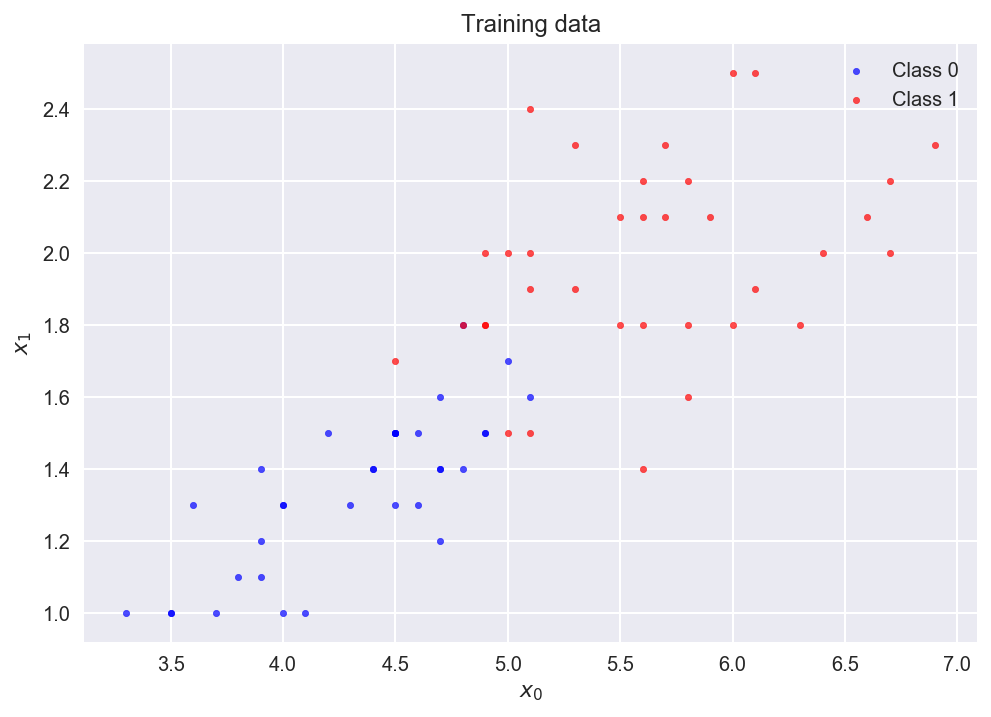

In [3]:
# Visualization of the training data.
mpl.style.use('seaborn')

fig = plt.figure()
plt.scatter(X_train[Y_train[:,0]==-1, 0], X_train[Y_train[:,0]==-1, 1], 
            marker='o', color='b', alpha=0.7, s=10, label='Class 0')
plt.scatter(X_train[Y_train[:,0]==+1, 0], X_train[Y_train[:,0]==+1, 1], 
            marker='o', color='r', alpha=0.7, s=10, label='Class 1')

plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.legend(loc='upper right', fontsize=10)
plt.title('Training data')
plt.show()

#### Training Procedure

In [4]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

In [5]:
# Gradient of loss function: L'(W1, b1, W2, b2).
def L_prime(X, Y, W1, b1, W2, b2):
    """ L'(W,b) function. 
    X:  Feature matrix.    Shape: [n,2].
    Y:  Label vector.      Shape: [n,1].
    W1: Weight matrix W1.  Shape: [2,3].
    b1: Bias vector b1.    Shape: [3,1].
    W2: Weight matrix W2.  Shape: [3,1].
    b2: Bias vector b2.    Shape: [1,1].
    Return the gradients: dL/dW1 (Shape: [2,3]), dL/db1 (Shape: [3,1]),
                          dL/dW2 (Shape: [3,1]), dL/db2 (Shape: [1,1]).
    """
    # Get dimensions.
    n = X.shape[0]
    
    # Calculate feed-forward values.
    H = sigmoid(W1.T.dot(X.T) + b1).T     # Shape: [n, 3].
    P = sigmoid(Y * (H.dot(W2) + b2))  # Shape: [n, 1].
    
    # Calculate the gradients: dL/dW1, dL/db1, dL/dW2, dL/db2.
    dL_by_dW2 =  H.T.dot((P-1) * (Y))        # Shape: [3,1].
    dL_by_db2 =  np.sum((P-1) * (Y))         # Shape: [1,1].
    dL_by_dH  = ((P-1) * Y).dot(W2.T)        # Shape: [n,3].
    
    dL_by_dW1  = X.T.dot(dL_by_dH * H * (1-H))                            # Shape: [2,3].
    dL_by_db1  = np.sum((dL_by_dH * H * (1-H)).T, axis=1, keepdims=True)                            # Shape: [3,1].
    
    # Return the gradients.
    return dL_by_dW1, dL_by_db1, dL_by_dW2, dL_by_db2

In [6]:
def L(X, Y, W1, b1, W2, b2):
    """ L(W,b) function. 
    X:  Feature matrix.    Shape: [n,2].
    Y:  Label vector.      Shape: [n,1].
    W1: Weight matrix W1.  Shape: [2,3].
    b1: Bias vector b1.    Shape: [3,1].
    W2: Weight matrix W2.  Shape: [3,1].
    b2: Bias vector b2.    Shape: [1,1].
    Return the loss.       Shape: Scalar.
    """
    # Get dimensions.
    n = X.shape[0]
    
    # Calculate feed-forward values.
    H = sigmoid(W1.T.dot(X.T) + b1).T     # Shape: [n, 3].
    P = sigmoid(Y * (H.dot(W2) + b2))  # Shape: [n, 1].
    
    # Get the loss.
    L = float(-sum(np.log(P)))                           # Shape: Scalar.
    #print(L)
    return L

In [7]:
learning_rate = 0.0025
n_iter = 200000                        # Number of iterations
np.random.seed(0)
W1 = np.random.randn(2,3)/((2*3)**2)   # Weight matrix 1.
b1 = np.random.randn(3,1)/((3*1)**2)   # Bias vector 1.
W2 = np.random.randn(3,1)/((3*1)**2)   # Weight matrix 2.
b2 = np.random.randn(1,1)/((1*1)**2)   # Bias vector 2.

# We will keep track of training loss over iterations.
iterations = [0]
L_list = [L(X_train, Y_train, W1, b1, W2, b2)]
for i in range(n_iter):
    
    gradient_W1, gradient_b1, gradient_W2, gradient_b2 = \
        L_prime(X_train, Y_train, W1, b1, W2, b2)
    W1_new = W1 - learning_rate * gradient_W1
    b1_new = b1 - learning_rate * gradient_b1
    W2_new = W2 - learning_rate * gradient_W2
    b2_new = b2 - learning_rate * gradient_b2
    iterations.append(i+1)
    L_list.append(L(X_train, Y_train, W1_new, b1_new, W2_new, b2_new))
    
    # L1-norm of weight/bias changing.
    norm = np.abs(W1_new-W1).sum() + np.abs(b1_new-b1).sum() + \
           np.abs(W2_new-W2).sum() + np.abs(b2_new-b2).sum() 
    
    if i%500 == 0:
        print('i: {:6d} L: {:.3f} norm:{:.6f}'.format(i, L_list[-1], norm))
        
    W1 = W1_new
    b1 = b1_new
    W2 = W2_new
    b2 = b2_new
    
print ('W1 matrix: \n' + str(W1))
print ('b1 vector: \n' + str(b1))
print ('W2 matrix: \n' + str(W2))
print ('b2 vector: \n' + str(b2))

i:      0 L: 54.115 norm:0.105332
i:    500 L: 42.258 norm:0.023591
i:   1000 L: 26.985 norm:0.025052
i:   1500 L: 18.117 norm:0.015071
i:   2000 L: 14.470 norm:0.009972
i:   2500 L: 12.670 norm:0.007384
i:   3000 L: 11.666 norm:0.005604
i:   3500 L: 11.059 norm:0.004382
i:   4000 L: 10.671 norm:0.003560
i:   4500 L: 10.411 norm:0.002951
i:   5000 L: 10.233 norm:0.002477
i:   5500 L: 10.106 norm:0.002098
i:   6000 L: 10.015 norm:0.001792
i:   6500 L: 9.948 norm:0.001540
i:   7000 L: 9.898 norm:0.001330
i:   7500 L: 9.861 norm:0.001154
i:   8000 L: 9.832 norm:0.001005
i:   8500 L: 9.811 norm:0.000878
i:   9000 L: 9.794 norm:0.000770
i:   9500 L: 9.781 norm:0.000676
i:  10000 L: 9.771 norm:0.000595
i:  10500 L: 9.763 norm:0.000525
i:  11000 L: 9.757 norm:0.000468
i:  11500 L: 9.752 norm:0.000418
i:  12000 L: 9.748 norm:0.000375
i:  12500 L: 9.745 norm:0.000339
i:  13000 L: 9.742 norm:0.000309
i:  13500 L: 9.740 norm:0.000284
i:  14000 L: 9.738 norm:0.000265
i:  14500 L: 9.736 norm:0.0002

i: 125000 L: 5.038 norm:0.000650
i: 125500 L: 5.030 norm:0.000646
i: 126000 L: 5.022 norm:0.000642
i: 126500 L: 5.014 norm:0.000638
i: 127000 L: 5.007 norm:0.000635
i: 127500 L: 4.999 norm:0.000631
i: 128000 L: 4.992 norm:0.000628
i: 128500 L: 4.984 norm:0.000624
i: 129000 L: 4.977 norm:0.000621
i: 129500 L: 4.970 norm:0.000617
i: 130000 L: 4.962 norm:0.000614
i: 130500 L: 4.955 norm:0.000611
i: 131000 L: 4.948 norm:0.000608
i: 131500 L: 4.941 norm:0.000604
i: 132000 L: 4.935 norm:0.000601
i: 132500 L: 4.928 norm:0.000598
i: 133000 L: 4.921 norm:0.000595
i: 133500 L: 4.914 norm:0.000592
i: 134000 L: 4.908 norm:0.000589
i: 134500 L: 4.901 norm:0.000586
i: 135000 L: 4.895 norm:0.000583
i: 135500 L: 4.889 norm:0.000580
i: 136000 L: 4.882 norm:0.000578
i: 136500 L: 4.876 norm:0.000575
i: 137000 L: 4.870 norm:0.000572
i: 137500 L: 4.864 norm:0.000569
i: 138000 L: 4.858 norm:0.000567
i: 138500 L: 4.852 norm:0.000564
i: 139000 L: 4.846 norm:0.000561
i: 139500 L: 4.840 norm:0.000559
i: 140000 

#### Training Loss Curve

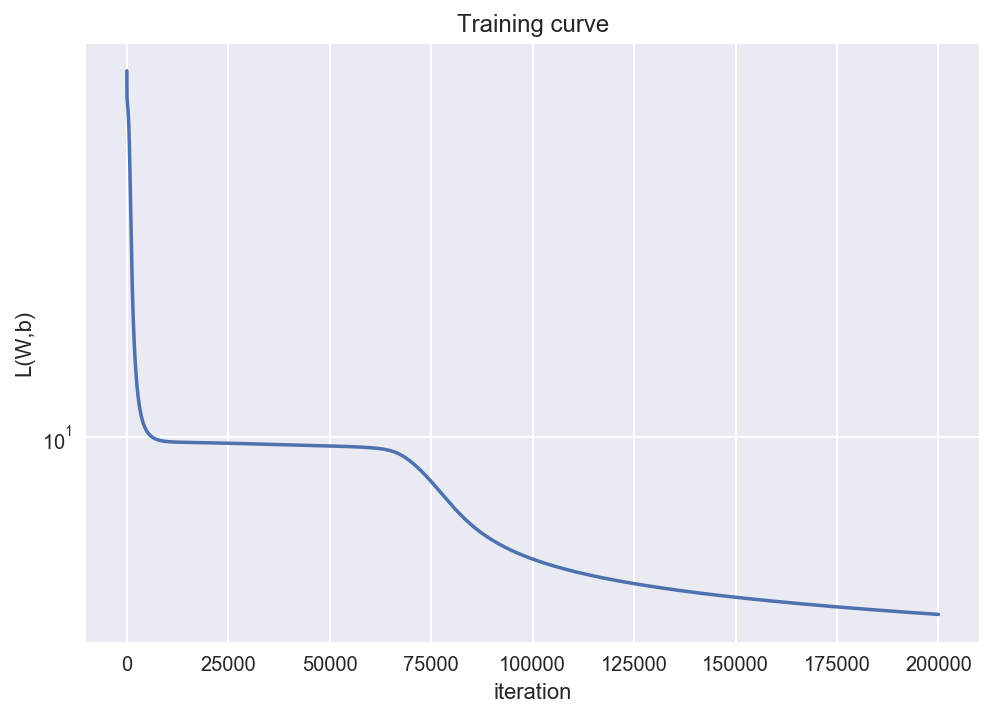

In [8]:
plt.title('Training curve')
plt.xlabel('iteration')
plt.ylabel('L(W,b)')
plt.semilogy(iterations, np.array(L_list).reshape(-1, 1))
plt.show()

#### Results on Training Data

In [9]:
# Prepare for decision boundary.
num = 100
X0_plane_range = np.linspace(1,7,num)
X1_plane_range = np.linspace(0,2.5,num)
X0_plane, X1_plane = np.meshgrid(X0_plane_range, X1_plane_range)
X_decision = np.stack([X0_plane.reshape(-1), X1_plane.reshape(-1)]).T

# Calculate feed-forward values.
f_decision = sigmoid(X_decision.dot(W1)+b1.T).dot(W2)+b2.T # Shape: [n,1].
yhat_decision = np.sign(f_decision)

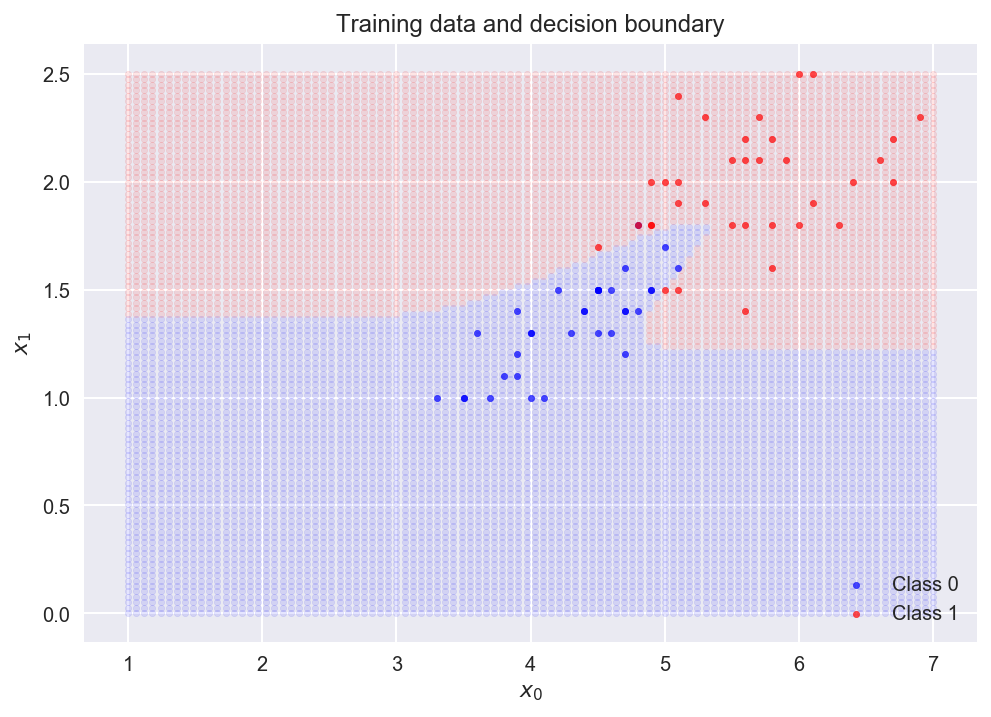

In [10]:
# Training data points and decision boundary. 
plt.scatter(X_decision[yhat_decision[:,0]==-1, 0], X_decision[yhat_decision[:,0]==-1, 1], marker='o', color='b', alpha=0.1, s=10)
plt.scatter(X_decision[yhat_decision[:,0]==1, 0], X_decision[yhat_decision[:,0]==1, 1], marker='o', color='r', alpha=0.1, s=10)

plt.scatter(X_train[Y_train[:,0]==-1, 0], X_train[Y_train[:,0]==-1, 1], marker='o', color='b', alpha=0.7, s=10, label='Class 0')
plt.scatter(X_train[Y_train[:,0]==1, 0], X_train[Y_train[:,0]==1, 1], marker='o', color='r', alpha=0.7, s=10, label='Class 1')

plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Training data and decision boundary')

plt.legend(loc='lower right', fontsize=10)

#### Results on Test Data

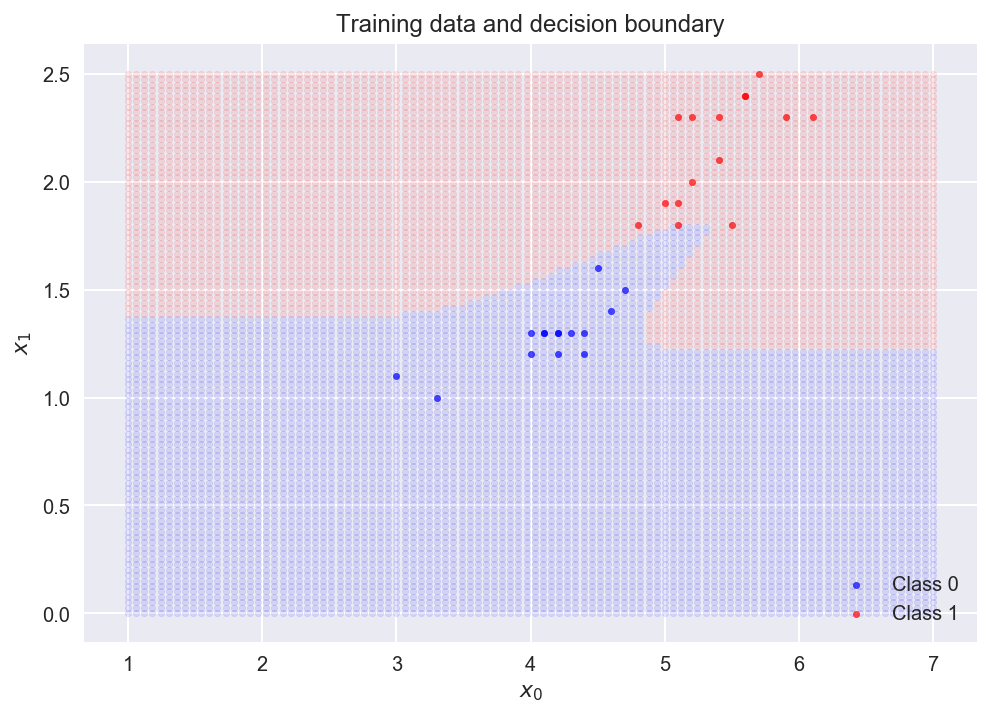

In [11]:
# Test data points and decision boundary. 
plt.scatter(X_decision[yhat_decision[:,0]==-1, 0], X_decision[yhat_decision[:,0]==-1, 1], marker='o', color='b', alpha=0.1, s=10)
plt.scatter(X_decision[yhat_decision[:,0]==1, 0], X_decision[yhat_decision[:,0]==1, 1], marker='o', color='r', alpha=0.1, s=10)

plt.scatter(X_test[Y_test[:,0]==-1, 0], X_test[Y_test[:,0]==-1, 1], marker='o', color='b', alpha=0.7, s=10, label='Class 0')
plt.scatter(X_test[Y_test[:,0]==1, 0], X_test[Y_test[:,0]==1, 1], marker='o', color='r', alpha=0.7, s=10, label='Class 1')

plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Training data and decision boundary')

plt.legend(loc='lower right', fontsize=10)

In [12]:
# Calculate the test error.
f_test = sigmoid(X_test.dot(W1)+b1.T).dot(W2)+b2.T  # Shape: [n,1].
yhat_test = np.sign(f_test)
test_error = 1 - np.sum(yhat_test == Y_test) / Y_test.shape[0]
print('Test error: {}'.format(test_error))

Test error: 0.033333333333333326
